<a href="https://colab.research.google.com/github/joaochenriques/MCTE_2020_2021/blob/main/BarragesPowerLimits/BarragesPowerLimits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/MCTE_2020_2021/main/utils/mpl_utils.py

In [23]:
import numpy as np
import matplotlib.pyplot as mpl
import mpl_utils as mut
%config InlineBackend.figure_formats = ['svg']
mut.config_plots()

In [24]:
π = np.pi
two_π = 2.0 * π
rpm2rads = π / 30.0
gr = 9.8
sqrt_gr = np.sqrt( gr )

In [25]:
def Energy_star( τ1, τ2, z1_max ):
  z2 = np.cos( two_π * τ2 )
  e1 = ( z1_max**2 - z2**2 ) / 2.0
  e2 = ( z1_max - z2 ) / ( two_π * ( τ1 - τ2 ) ) * ( np.sin( two_π * τ2 ) - np.sin( two_π * τ1 ) )
  return ( e1 + e2 ) / 4.0

In [26]:
τ1_vec = np.linspace( 0.0, 0.4999, 200 )
τ2_vec = np.linspace( 0.5, 1.0, 200 )
T1, T2 = np.meshgrid( τ1_vec, τ2_vec )
ZE = Energy_star( T1, T2, 1.0 ) 

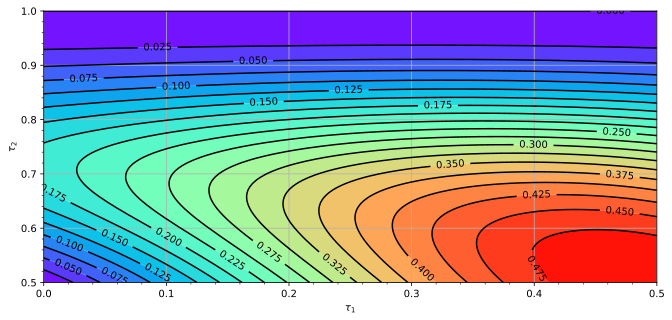

In [27]:
CS = mpl.contourf( T1, T2, ZE, 20, cmap = mpl.cm.rainbow )
CS = mpl.contour ( T1, T2, ZE, 20, colors = 'k' )
mpl.clabel( CS, CS.levels, inline = True )
mpl.xlabel( r'$\tau_1$' ) 
mpl.ylabel( r'$\tau_2$' )
mpl.xlim( 0.0, 0.5 )
mpl.grid()
mpl.minorticks_on()

In [28]:
# RHS of the ODE that models the sluicing
def model( τ, z, g_ε ):
  # use only positive value ensures the sluice gate operates has desired
  h = np.max( ( 0.0, np.cos( two_π * τ ) - z ) ) 
  return g_ε * np.sqrt( h )

Compute the barrage final water level, $z_4$ as function of the dimensionless sluice gate parameter, $g_\epsilon$, and initial water level, $z_3$. 

In [29]:
# dimensionless sluice gate parameter
g_ε_vec = np.linspace( 0, 7, 8 )

# starting barrage level
z3_vec = np.linspace( -1.0, 1.0, 20 )

# z4 is the computed barrage final level as function of g_ε and z3
z4_mat = np.zeros( ( g_ε_vec.size, z3_vec.size ) )

# time points
τ_vec  = np.linspace( 0.0, 1.0, 100 )
delta_τ = τ_vec[1] - τ_vec[0]

for k, g_ε in enumerate( g_ε_vec ):
  for i, z3 in enumerate( z3_vec ):
    for τ in τ_vec[:-1]: # τ is the initial time of each time step
      z3 = z3 + delta_τ * model( τ, z3, g_ε )
    z4_mat[ k, i ] = z3

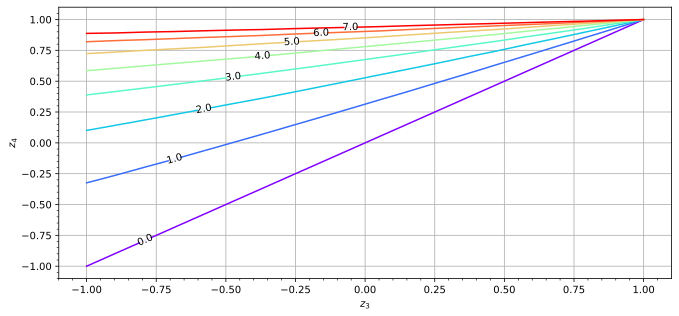

In [30]:
col = mpl.cm.rainbow( np.linspace( 0.0, 1.0, g_ε_vec.size ) )    

for k, g_ε in enumerate( g_ε_vec ):
  z4_vec = z4_mat[k]
  mpl.plot( z3_vec, z4_vec, color = col[k] )
  mut.inline_label( '%.1f' % g_ε, z3_vec, z4_vec, k+2, fontsize=10 )

mpl.xlabel( '$z_3$' )
mpl.ylabel( '$z_4$' )
mpl.grid()
mpl.minorticks_on()